In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
sns.set()
#to fix all the plot size to fixed size
plt.rcParams['figure.figsize'] = [16,8]


In [ ]:
#here we will be learning about the arima model basics

In [10]:
'''
if the month , day , year's are present in seperate columns the we need to pass the
parse_dates = ['day','month','year'] and make index_col accordingly
'''
airPassengerData = pd.read_csv('/Users/uday_kumar_swamy/Library/CloudStorage/OneDrive-Personal/datascience_videos/machinelearningpractice/machinelearning/dataset/AirPassengers.csv',parse_dates=True,index_col='Month')

In [11]:
airPassengerData.shape

(144, 1)

In [14]:
airPassengerData.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [13]:
airPassengerData.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [ ]:
'''
it is always advised to explicitly assign the period of the
index, in our example it is monthly period data
'MS' --> monthly data
'''
airPassengerData.index.freq = 'MS'

<AxesSubplot:xlabel='Month'>

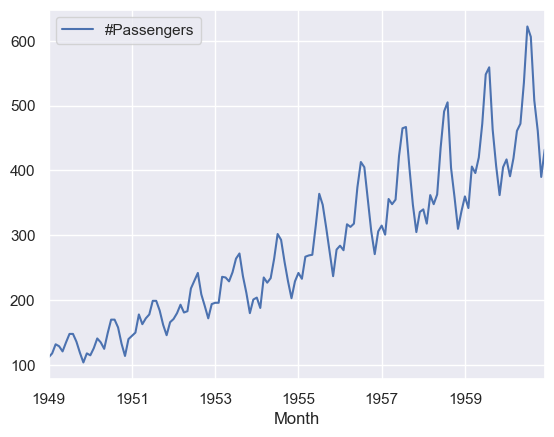

In [15]:
airPassengerData.plot()

In [ ]:
'''
now check the stationarity of the time series : Dickey Fuller Test
H0 --> null hypothesis True if p > 0.05--> data is not stationary 
Ha --> null hypothesis is False if p <=0.05 --> data is stationary (Ha --> alternate hypothesis)

If p-value of the test is less than 0.05(%5 signinficance) 
then reject null hypothesis and conclude data is stationary
'''

In [16]:
#now lets check ADFuller
from statsmodels.tsa.stattools import adfuller

In [17]:
#here the 1--> calculeted test statistics 2 --> p_value
'''
the test statistical value should be less than the alpha i.e 5% - -2.88404 to reject the null hypothesis
alternate we can check for the p_value
'''
adfuller(airPassengerData)

(0.8153688792060502,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [18]:
#get the p_value
adfuller(airPassengerData)[1]

0.991880243437641

In [19]:
#as the p_value is greater than 0.05 then we need to do diffrencing, either it can be 1st order or 2nd order
#dropna() -- as we are shifting the value will have the missing values so we need to drop them
adfuller(airPassengerData.diff(1).dropna())[1]

0.05421329028382537

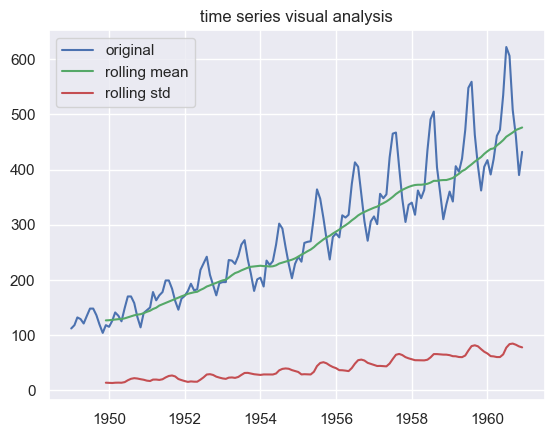

In [20]:
#checking the stationarity visually - Rolling mean and Rolling Standard diviation
#rolling() --> calculate the moving average -- window= 12 --> 12 month 
#its clear non-statitionary data as it shows some trend
rollmean = airPassengerData.rolling(window=12).mean()
rollstd = airPassengerData.rolling(window=12).std()
plt.plot(airPassengerData,color = 'b', label ='original')
plt.plot(rollmean,color='g',label = 'rolling mean')
plt.plot(rollstd,color='r', label = 'rolling std')
plt.legend()
plt.title('time series visual analysis')
plt.show()

In [21]:
#we have the d value as 1 (d = 1) and we need to find the p and q values 
#using the statsmodels.graphics.tsaplots , plot_acf and plot_pacf
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf

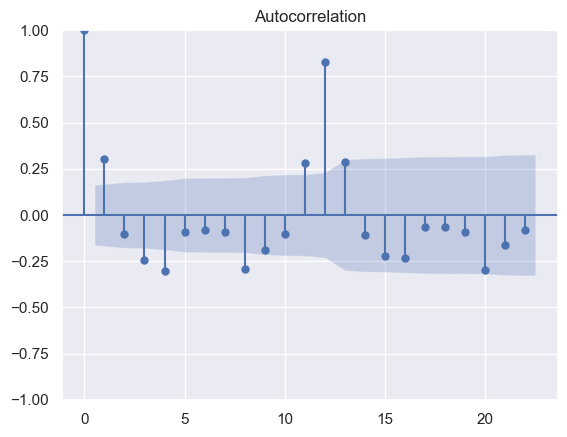

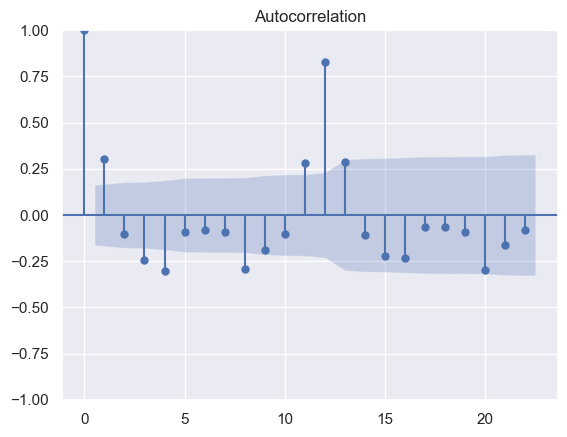

In [24]:
plot_acf(airPassengerData.diff().dropna())
'''
ignore the fist spike as it is directly corelated
post that 1 spike cuts zone and 2 could not cross zone 
so the q=1
'''

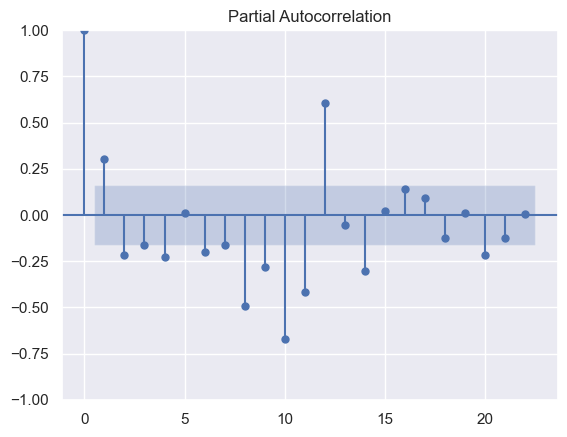

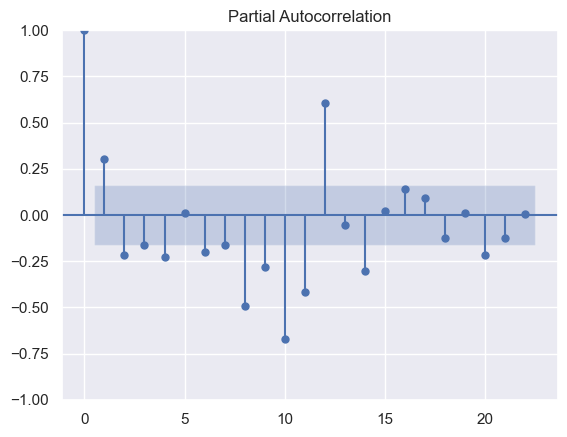

In [25]:
plot_pacf(airPassengerData.diff().dropna())
#ignore first leg, as its direct co-related 
'''
after that 1 and 2 spikes crosed zone and they are significant
after that 3 one does not cut off the zone so we consider till
2 only so p=2 
'''


In [28]:
'''
now we have all data p,d,q , we can build the ARIMA model
'''
#split last 24 months in test data rest into train, 
'''
Thumb rules 
- If i wanna test the 12 months of the future data then i should have 12 months in test data
- in test data we should have at least one full season data
'''
train = airPassengerData.iloc[:120]
test = airPassengerData[120:]

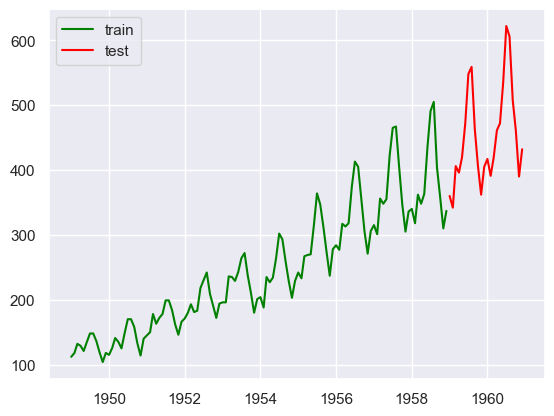

In [27]:
plt.plot(train,color='green',label = 'train')
plt.plot(test,color='red',label='test')
plt.legend()
plt.show()

In [30]:
#Import Arima from stat model
from statsmodels.tsa.arima.model import ARIMA

In [31]:
arima = ARIMA(train,order=(2,1,1),freq='MS')
arima_fit = arima.fit()
'''
ignore 1 and 3 table
'''
arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            #Passengers   No. Observations:                  120
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -552.523
Date:                Tue, 26 Mar 2024   AIC                           1113.047
Time:                        21:45:21   BIC                           1124.163
Sample:                    01-01-1949   HQIC                          1117.561
                         - 12-01-1958                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0634      0.097     10.921      0.000       0.873       1.254
ar.L2         -0.4714      0.101     -4.651      0.000      -0.670      -0.273
ma.L1         -0.8355      0.087     -9.587      0.000      -1.006      -0.665
sigma2       627.3608     80.069      7.835      0.000     470.428     784.294
===================================================================================
Ljung-Box (L1) (Q):                   0.76   Jarque-Bera (JB):                 1.78
Prob(Q):                              0.38   Prob(JB):                         0.41
Heteroskedasticity (H):               6.46   Skew:                             0.29
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [32]:
fcast = arima_fit.get_forecast(steps = 24)

In [33]:
detailed_forecast = fcast.summary_frame()
detailed_forecast
#mean_ci_lower and mean_ci_upper --> confidence range 95%

#Passengers,mean,mean_se,mean_ci_lower,mean_ci_upper
1959-01-01,368.118819,25.047172,319.027264,417.210374
1959-02-01,388.482227,39.664855,310.740540,466.223914
1959-03-01,395.466819,46.896483,303.551402,487.382236
1959-04-01,393.294708,49.624923,296.031646,490.557770
1959-05-01,387.692329,50.541867,288.632090,486.752567
1959-06-01,382.758772,50.979093,282.841585,482.675959
1959-07-01,380.153485,51.415948,279.380080,480.926890
1959-08-01,379.708764,52.048932,277.694731,481.722797
1959-09-01,380.464002,52.922157,276.738481,484.189523
1959-10-01,381.476758,53.951257,275.734238,487.219279


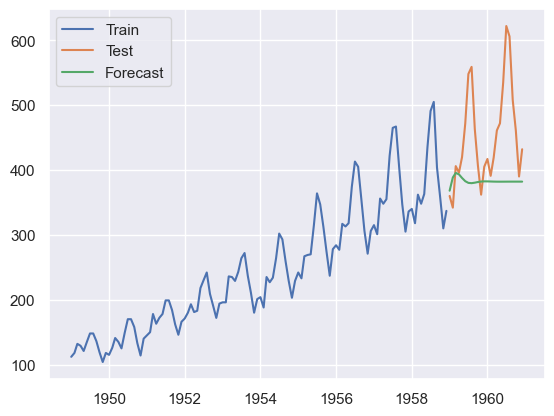

In [34]:
#visualise actual vs forcast values
#Arima will not capture the seasonal fluctuations
#captures only trend
plt.plot(train,label = 'Train')
plt.plot(test,label='Test')
plt.plot(detailed_forecast['mean'],label='Forecast')
plt.legend()

In [37]:
forecasts = fcast.summary_frame()['mean'].values
forecasts

array([368.11881923, 388.48222681, 395.46681876, 393.29470789,
       387.69232868, 382.75877224, 380.15348487, 379.70876385,
       380.46400224, 381.4767582 , 382.19768659, 382.48689352,
       382.4545824 , 382.28388911, 382.11760755, 382.02125165,
       381.99717413, 382.01699319, 382.04941884, 382.07455705,
       382.08600307, 382.08632432, 382.08127019, 382.07574426])

In [39]:
from statsmodels.tools.eval_measures import rmse
rmse(test['#Passengers'],forecasts)
#select the model with less RMSE

102.62718119962426